**import all the modules needed**

In [29]:
import pandas as pd
import mplfinance as mpf
import mplfinance as fplt
import yfinance as yf
import matplotlib.pyplot as plt
import plotly
import plotly.graph_objects as go
import seaborn as sns
import numpy as np
from datetime import datetime
from dateutil.relativedelta import relativedelta
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

**get the data of nasdaq 100 futres from yahoo finance , this time i want to know the weekly trend, so i created a 10weeks and 40 weeks sma dataframe**

In [30]:
ticker="NQ=F"

today = datetime.now()

df = yf.download(ticker, start="2000-01-01", end=today, interval='1wk')

df['SMA_10'] = df['Adj Close'].rolling(10, min_periods=1).mean()

df['SMA_40'] = df['Adj Close'].rolling(40, min_periods=1).mean()

df.tail()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,SMA_10,SMA_40
Date,,,,,,,,
2023-11-06,15187.00,15612.750000,15138.00,15596.25,15596.25,3019155,15040.52002,14263.499023
2023-11-13,15586.25,16049.500000,15465.25,15895.75,15895.75,3070988,15100.34502,14352.236523
2023-11-20,15895.00,16173.500000,15837.25,16021.00,16021.00,2680653,15158.92500,14443.011523
2023-11-27,16008.00,16208.500000,15856.00,16023.75,16023.75,3050933,15274.35000,14543.680273
2023-12-04,16022.00,16118.799805,15721.25,16094.00,16094.00,3926758,15397.10000,14638.249023


**plot the sma curve**
**this time we saw 10 weeks sma is over 40 weeks , there is higher probability to earn profit by long position**

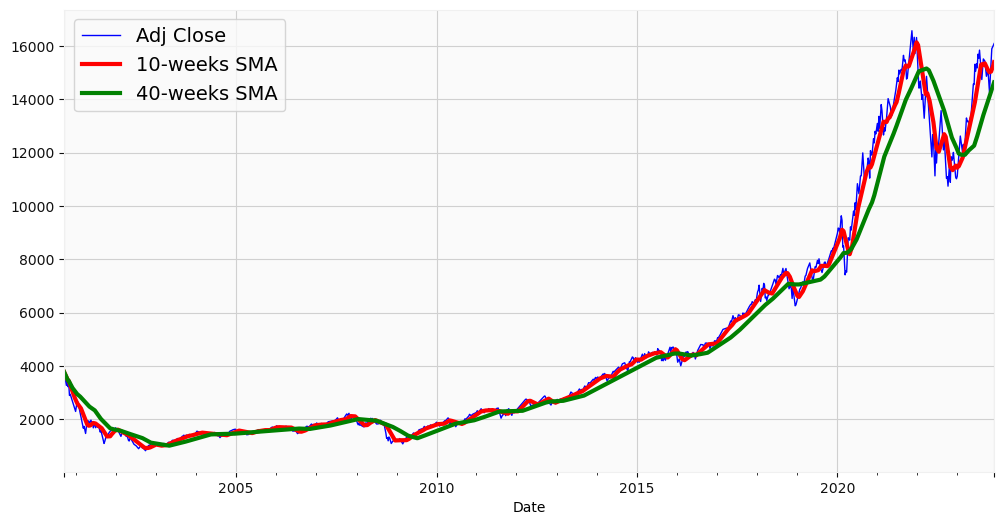

In [31]:
df['Adj Close'].plot(color='blue', linewidth=1, figsize=(12,6))
df['SMA_10'].plot(color='red', linewidth=3, figsize=(12,6))
df['SMA_40'].plot(color='green', linewidth=3, figsize=(12,6))
plt.legend(labels =['Adj Close','10-weeks SMA', '40-weeks SMA'], fontsize=14)

** then renko chart, first get the monthly data of nasdaq 100**

In [32]:
df = yf.download(ticker, start="2000-01-01", end=today,interval='1mo')

df.tail()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-07-01,15331.00,16062.750000,15063.25,15857.5,15857.5,12133492
2023-08-01,15869.25,15889.250000,14609.25,15538.5,15538.5,15148893
2023-09-01,15534.00,15661.250000,14586.00,14866.5,14866.5,11117798
2023-11-01,14460.00,16208.500000,14410.75,15985.5,15985.5,13228152
2023-12-01,15955.00,16118.799805,15721.25,16094.0,16094.0,4548468


**i am looking for long term investment to i set 5% of the futures price per brick**

In [33]:
x=df['Adj Close'].iloc[-1]*0.05
print('Brick Size is',x)

Brick Size is 804.7


**the chart looks like this**

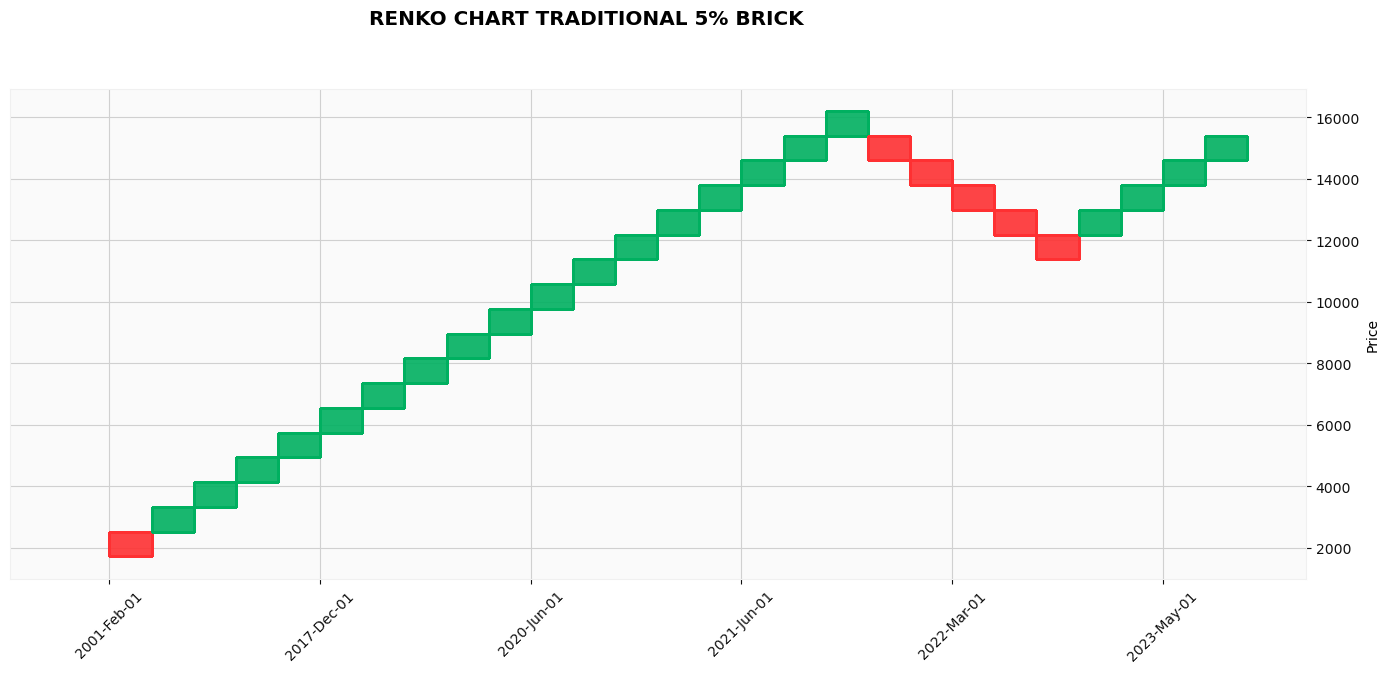

In [34]:
fplt.plot(df,type='renko',
          renko_params=dict(brick_size=x),
          style='yahoo',
          figsize=(18,7), 
          title = "RENKO CHART TRADITIONAL 5% BRICK")

**this renko chart brick size varies depends on the sizeof the underlying assets for example if stock price is 1000 the brick size should be 10 if stock price (indice) is 10000 or above i will take the brick size as 100**

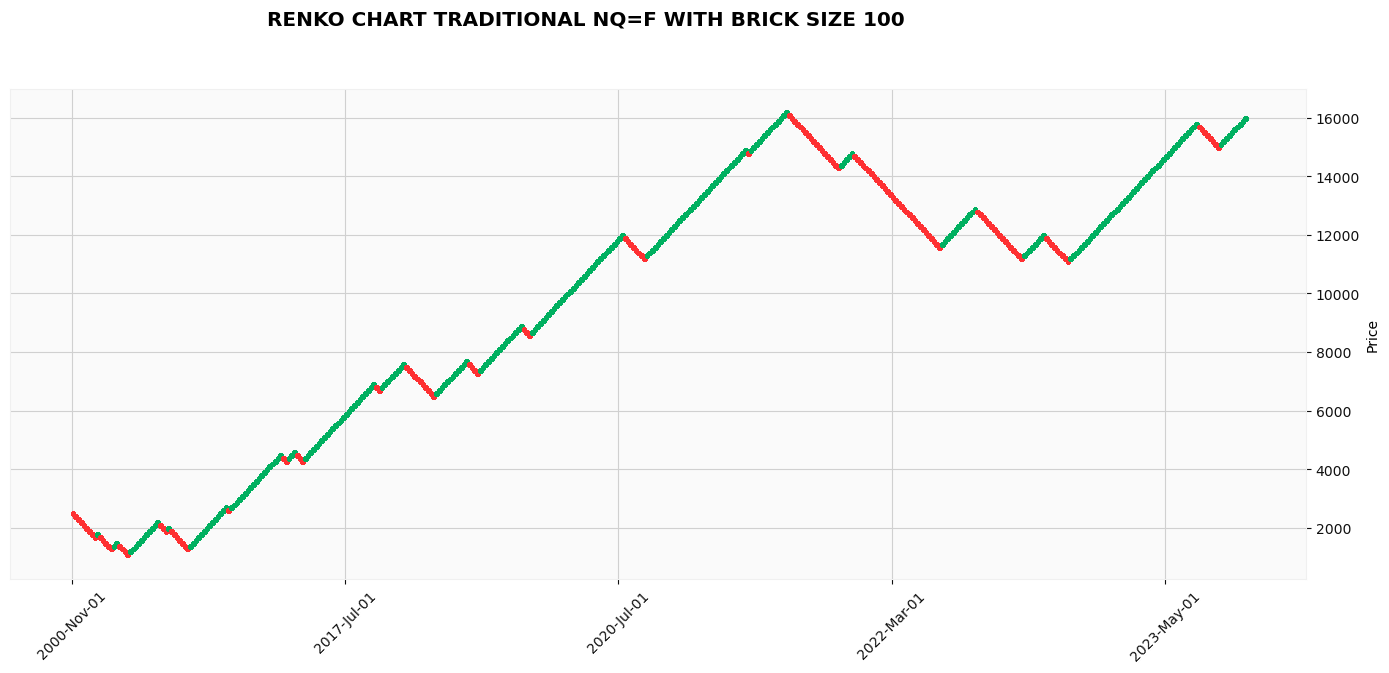

In [35]:
y=df['Adj Close'].iloc[-1]
if y > 0 and y <=10:
    x = 0.5
elif y > 10 and y<= 50:
    x = 1
elif y > 50 and y <= 100:
    x = 2.5
elif y > 100 and y <= 1000:
    x = 5
elif y > 1000 and y <= 10000:
    x = 10
elif y > 10000:
    x = 100
fplt.plot(df,type='renko',
          renko_params=dict(brick_size=x),
          style='yahoo',
          figsize=(18,7),
          title = "RENKO CHART TRADITIONAL {0} WITH BRICK SIZE {1}".format(ticker,x))

**good weekly simple moving average trend and 2 renko analysis are green brick in this moment i believe that its the right time to long nasdaq100 futures**

**Now i would like to compare Nasdaq100 with other index , this time i choose Hong Kong , China, Japan and US index**

In [36]:
indice = [ticker,'^DJI','^GSPC','^IXIC','^N225','^HSI','^HSCE','000001.SS','399001.SZ']

In [37]:
from dateutil.relativedelta import relativedelta

three_yrs_ago = today - relativedelta(years=3)

#recent three years data
df =  yf.download(indice, start = three_yrs_ago, end = today,interval='1d')["Adj Close"].rename(columns={"^DJI": "Dow Jones", "^GSPC": "S&P 500", "^IXIC": "Nasdaq","^HSI": "Heng Seng Index", "^HSCE" : "Hang Seng China Enteprise" ,"000001.SS":"Shanghai Index", "399001.SZ":"Shenzhen Index",
                                                                                                                    "^N225":"Nikkei"})
df

[*********************100%***********************]  9 of 9 completed


,Shanghai Index,Shenzhen Index,NQ=F,Dow Jones,S&P 500,Hang Seng China Enteprise,Heng Seng Index,Nasdaq,Nikkei
Date,,,,,,,,,
2020-12-10,3373.275879,13731.339844,NaN,NaN,NaN,10415.719727,26410.589844,NaN,26756.240234
2020-12-11,3347.190918,13555.139648,12368.00,30046.369141,3663.459961,10452.500000,26505.869141,12377.870117,26652.519531
2020-12-14,3369.120117,13692.129883,12456.50,29861.550781,3647.489990,10443.120117,26389.519531,12440.040039,26732.439453
2020-12-15,3367.229980,13763.309570,12591.75,30199.310547,3694.620117,10399.559570,26207.289062,12595.059570,26687.839844
2020-12-16,3366.982910,13751.089844,12665.25,30154.539062,3701.169922,10461.900391,26460.289062,12658.190430,26757.400391
...,...,...,...,...,...,...,...,...,...
2023-12-04,3022.914062,9660.440430,15869.00,36204.441406,4569.779785,5703.330078,16646.050781,14185.490234,33231.269531
2023-12-05,2972.295898,9470.360352,15908.75,36124.558594,4567.180176,5609.629883,16327.860352,14229.910156,32775.820312
2023-12-06,2968.933105,9533.250000,15815.25,36054.429688,4549.339844,5663.919922,16463.259766,14146.709961,33445.898438


**Find out the return of each index**

In [38]:
market_rets = df.pct_change()
market_rets.head()

,Shanghai Index,Shenzhen Index,NQ=F,Dow Jones,S&P 500,Hang Seng China Enteprise,Heng Seng Index,Nasdaq,Nikkei
Date,,,,,,,,,
2020-12-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-12-11,-0.007733,-0.012832,NaN,NaN,NaN,0.003531,0.003608,NaN,-0.003877
2020-12-14,0.006552,0.010106,0.007156,-0.006151,-0.004359,-0.000897,-0.004390,0.005023,0.002999
2020-12-15,-0.000561,0.005199,0.010858,0.011311,0.012921,-0.004171,-0.006905,0.012461,-0.001668
2020-12-16,-0.000073,-0.000888,0.005837,-0.001483,0.001773,0.005995,0.009654,0.005012,0.002606


**The pairplot show the regressive of the index each other**

**The subplots show the correlation of return and closing price it might be more clear**

Text(0.5, 1.0, 'Correlation of indice closing price')

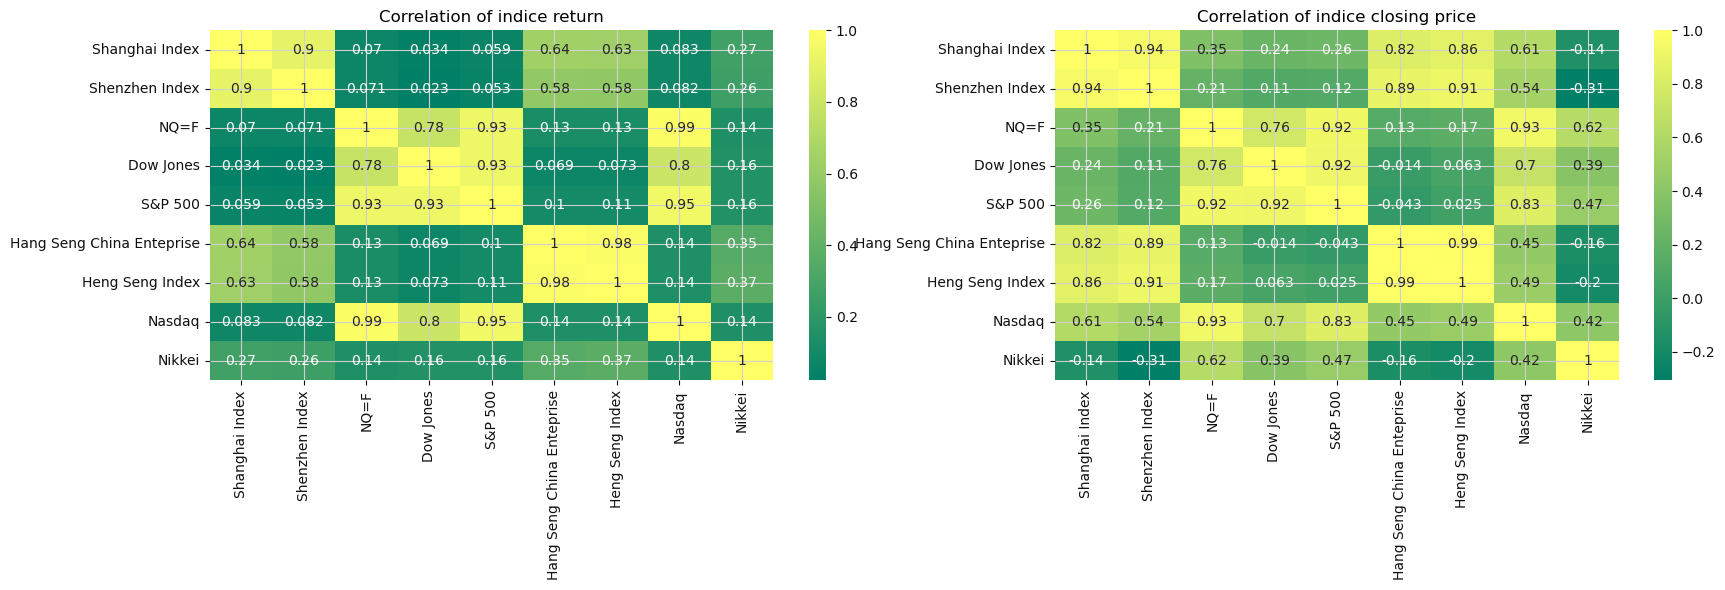

In [39]:
plt.figure(figsize=(20, 10))

plt.subplot(2, 2, 1)
sns.heatmap(market_rets.corr(), annot=True, cmap='summer')
plt.title('Correlation of indice return')

plt.subplot(2, 2, 2)
sns.heatmap(df.corr(), annot=True, cmap='summer')
plt.title('Correlation of indice closing price')

**The Risk and Return of each market some of them has low return high risk which not worth to invest**

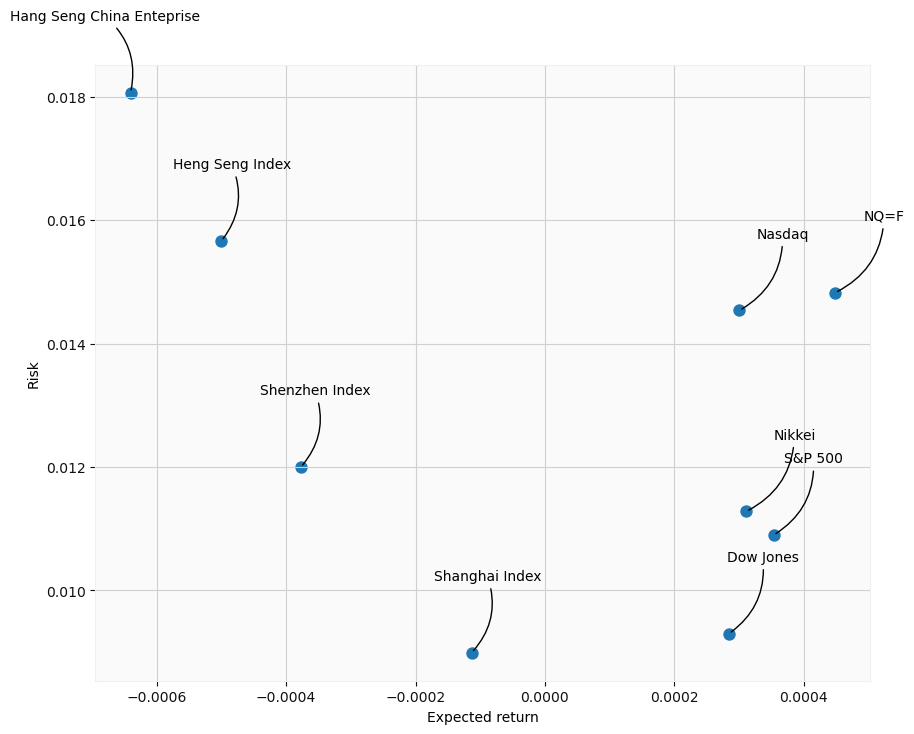

In [40]:
rets = market_rets.dropna()

dotdot = np.pi * 20

plt.figure(figsize=(10, 8))
plt.scatter(rets.mean(), rets.std(), s=dotdot)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom', 
                 arrowprops=dict(arrowstyle='-', color='black', connectionstyle='arc3,rad=-0.3'))

***Judge whether it is the correct moment to open position***

In [41]:
one_yrs_ago = today - relativedelta(years=1)
df = yf.download(ticker, start=one_yrs_ago, end=today, interval='1d')

[*********************100%***********************]  1 of 1 completed


In [42]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,251.000000,251.000000,251.000000,251.000000,251.000000,2.510000e+02
mean,13958.156375,14085.486254,13840.771714,13972.647414,13972.647414,6.190417e+05
std,1546.953583,1540.503102,1555.636361,1548.404176,1548.404176,1.392542e+05
min,10785.750000,10996.500000,10751.000000,10772.750000,10772.750000,4.122400e+04
25%,12655.375000,12800.625000,12518.500000,12659.750000,12659.750000,5.660880e+05
50%,14517.000000,14675.000000,14444.000000,14556.250000,14556.250000,6.278240e+05
75%,15304.500000,15414.500000,15164.625000,15293.500000,15293.500000,6.917520e+05
max,16087.500000,16208.500000,16034.500000,16094.000000,16094.000000,1.019700e+06


In [43]:
correlation = df[['Adj Close', 'Volume']].corr()
correlation

,Adj Close,Volume
Adj Close,1.000000,0.053783
Volume,0.053783,1.000000


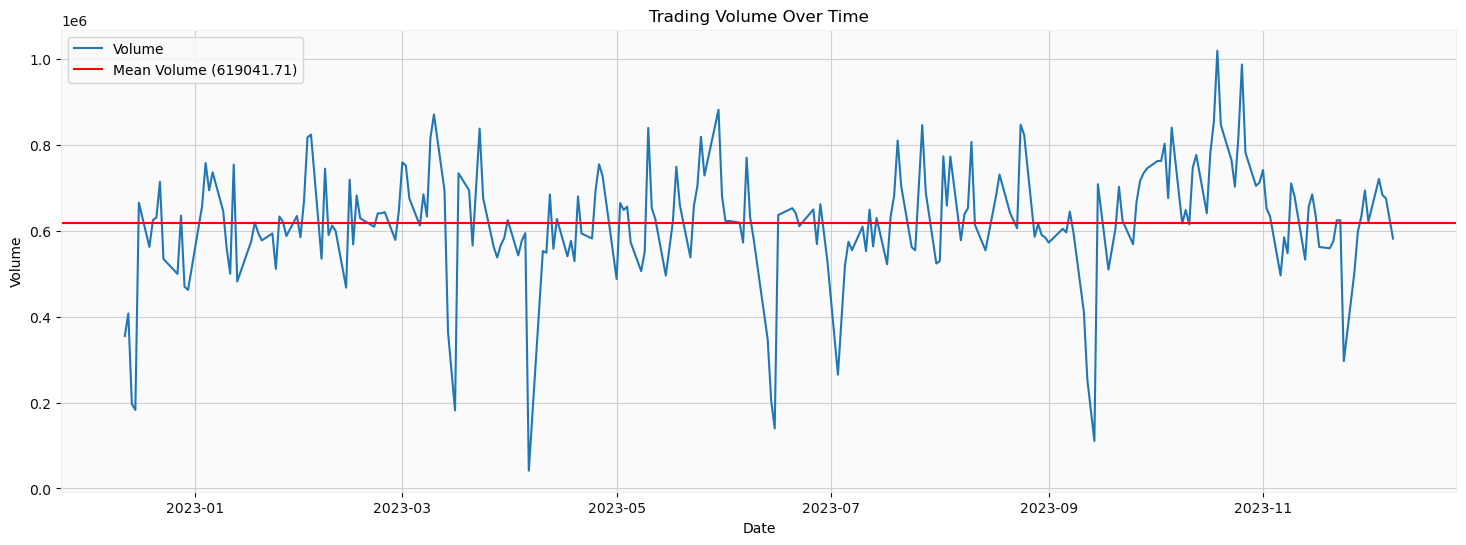

In [44]:
# Plotting trading volume versus date
plt.figure(figsize=(18, 6))
plt.plot(df['Volume'], label='Volume')

# Calculating mean of the volume
volume_mean = df['Volume'].mean()

# Plotting mean volume as a horizontal line
plt.axhline(y=volume_mean, color='r', linestyle='-', label=f'Mean Volume ({volume_mean:.2f})')

plt.title('Trading Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()
plt.show()

There are some high trading volume in October so it can be anticipated that the money is entering the nasdaq market

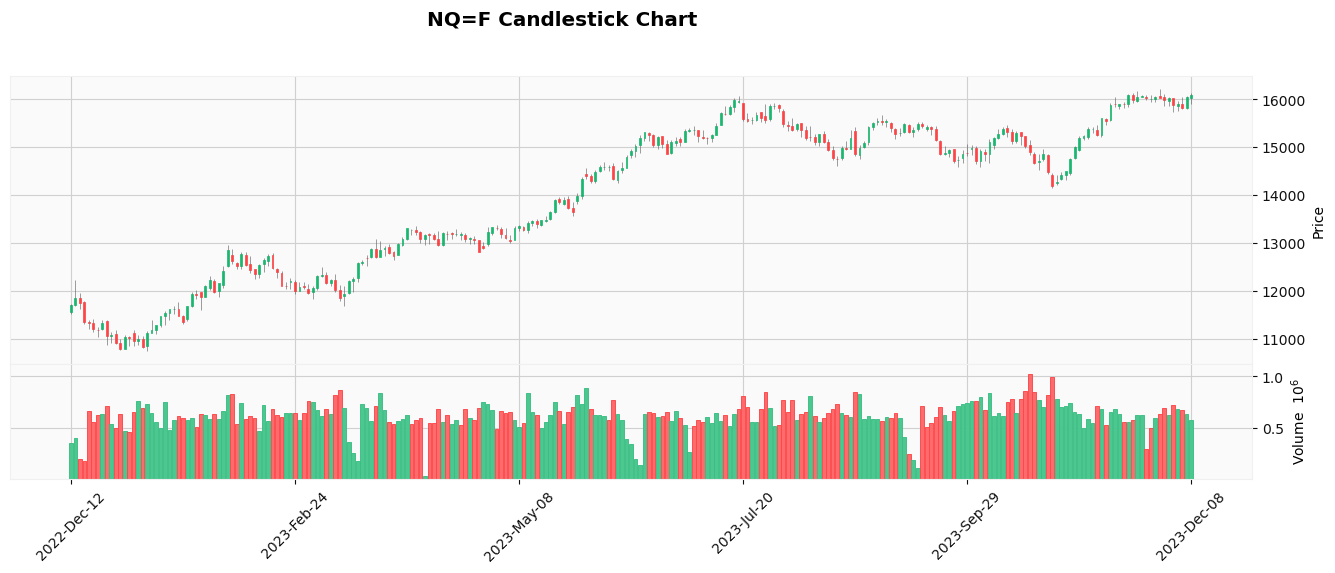

In [45]:
fplt.plot(df, type='candle', style='yahoo', title=f'{ticker} Candlestick Chart', 
          ylabel='Price', volume=True, figratio=(18,6))
fplt.show()

**Linear Regression Machine Learning Model**

In [46]:
df = yf.download(ticker, start="2000-01-01", end=today, interval='1d')

[*********************100%***********************]  1 of 1 completed


In [47]:
X = df.drop(['Close','Adj Close'], axis=1)
y = df['Adj Close']

In [48]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X.head()

,Open,High,Low,Volume
0,0.184354,0.185520,0.178713,0.046198
1,0.180396,0.187496,0.182154,0.044321
2,0.189452,0.191072,0.185946,0.049892
3,0.192651,0.191072,0.187762,0.044758
4,0.181314,0.185175,0.179542,0.035395


In [49]:
#now lets split data in test train pairs
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle=False)

Acc = []

In [50]:
from sklearn.linear_model import LinearRegression

# model training

model_1 = LinearRegression()
model_1.fit(X_train, y_train)

LinearRegression()

In [51]:
# prediction
y_pred_1 = model_1.predict(X_test)
pred_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_1})
pred_df

,Actual,Predicted
Date,,
2019-04-15,7647.75,7618.257206
2019-04-16,7679.50,7692.629927
2019-04-17,7689.75,7725.175881
2019-04-18,7712.50,7698.723520
2019-04-22,7734.75,7709.276688
...,...,...
2023-12-04,15869.00,15793.833584
2023-12-05,15908.75,15877.734894
2023-12-06,15815.25,15953.543605


In [52]:
# Measure the Accuracy Score
from sklearn.metrics import r2_score
 
print("Accuracy score of the predictions: {0}".format(r2_score(y_test, y_pred_1)))
Acc.append(r2_score(y_test, y_pred_1))

Accuracy score of the predictions: 0.9991685184120889


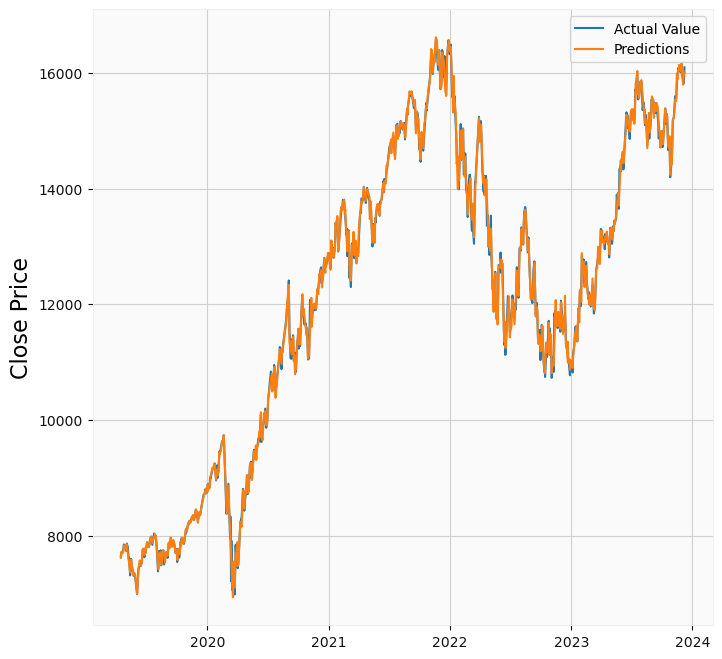

In [53]:
plt.figure(figsize=(8,8))
plt.ylabel('Close Price', fontsize=16)
plt.plot(pred_df)
plt.legend(['Actual Value', 'Predictions'])
plt.show()

**LSTM Model to predict the price**

In [54]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense

#get data
df = yf.download(ticker, start="2000-01-01", end=today, interval='1d')

#use adj close only
data = df.filter(['Adj Close']) 

#Scale the data to the range [0, 1] to facilitate training of neural networks
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

#Create training dataset and labels (convert time series data into a supervised learning problem)
def create_dataset(dataset, time_step=1):
    data_x, data_y = [], []
    for i in range(len(dataset) - time_step - 1):
        a = dataset[i:(i + time_step), 0]
        data_x.append(a)
        data_y.append(dataset[i + time_step, 0])
    return np.array(data_x), np.array(data_y)

#Set time step
time_steps = 60 
x_train, y_train = create_dataset(scaled_data, time_steps)

# Reshape the data into a shape for the LSTM input (samples, time_steps, features)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

#build up a neuralnetwork
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=25))
model.add(Dense(units=1))

#compile model
model.compile(optimizer='adam', loss='mean_squared_error')

#train the model
model.fit(x_train, y_train, batch_size=64, epochs=100)

#use the model to predict
last_x_inputs = scaled_data[-time_steps:]
last_x_inputs = np.reshape(last_x_inputs, (1, time_steps, 1))
predicted_price = model.predict(last_x_inputs)
predicted_price = scaler.inverse_transform(predicted_price)  #inverse transform

[*********************100%***********************]  1 of 1 completed


2023-12-10 20:56:14.967017: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-12-10 20:56:14.968641: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-12-10 20:56:14.969726: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

Epoch 1/100


2023-12-10 20:56:15.226035: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-12-10 20:56:15.227724: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-12-10 20:56:15.228980: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

91/91 [==============================] - 7s 32ms/step - loss: 0.0056
Epoch 2/100
91/91 [==============================] - 3s 30ms/step - loss: 1.6523e-04
Epoch 3/100
91/91 [==============================] - 3s 28ms/step - loss: 1.6352e-04
Epoch 4/100
91/91 [==============================] - 2s 26ms/step - loss: 1.5698e-04
Epoch 5/100
91/91 [==============================] - 2s 26ms/step - loss: 1.5334e-04
Epoch 6/100
91/91 [==============================] - 2s 26ms/step - loss: 1.5067e-04
Epoch 7/100
91/91 [==============================] - 2s 26ms/step - loss: 1.3744e-04
Epoch 8/100
91/91 [==============================] - 2s 26ms/step - loss: 1.3568e-04
Epoch 9/100
91/91 [==============================] - 2s 26ms/step - loss: 1.2360e-04
Epoch 10/100
91/91 [==============================] - 2s 27ms/step - loss: 1.2689e-04
Epoch 11/100
91/91 [==============================] - 2s 26ms/step - loss: 1.3266e-04
Epoch 12/100
91/91 [==============================] - 2s 26ms/step - loss: 1.31

2023-12-10 21:00:31.271297: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-12-10 21:00:31.272899: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-12-10 21:00:31.274543: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

1/1 [==============================] - 1s 726ms/step


In [55]:
from sklearn.metrics import mean_squared_error

#actual value
actual_price = data.values[-predicted_price.shape[0]:]

#RMSE
rmse = np.sqrt(mean_squared_error(actual_price, predicted_price))
print(rmse)

#R value
r_squared = r2_score(actual_price, predicted_price)
print(r_squared)

156.9638671875
nan


In [56]:
print("Predicted price for the next day:", predicted_price[0][0])

Predicted price for the next day: 15937.036
